## Extrae la informacion

In [103]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel(r"D:\alex_\Documents\Programacion\Bases de datos\Loteria Nacional\Mayor\_LLEVAR\BASE_Valores_Premios.xlsx", dtype=object)
df_mayor = df[df['PREMIO'] >= 300000]  # Compara con una cadena '300000'

# df_pivot = df_mayor.pivot(index="ORIGEN", columns="PREMIO", values="Valor")
# df_pivot.index = pd.to_numeric(df_pivot.index.str.replace('Mayor', ''), errors='coerce')
# df_pivot.head()

C:\Users\alex_\AppData\Local\Temp\ipykernel_17920\664067129.py:7: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df_pivot = df_mayor.pivot(index="ORIGEN", columns="PREMIO", values="Valor")


PREMIO,300000,850000,7000000
ORIGEN,,,
3866,15808,12578,34943
3867,12812,57056,37565
3868,39733,10658,35444
3869,1499,15257,8148
3870,7619,14660,46233


## Obten tu df

In [111]:
premios_a_filtrar = [1200, 5000, 10000]
df_filtrado = df[~df['PREMIO'].isin(premios_a_filtrar)]
df_pivot_todos = df_filtrado.pivot_table(index = "ORIGEN",columns="PREMIO", values = "Valor", aggfunc=lambda x: x).reset_index()
df_pivot_todos["ORIGEN"] = df_pivot_todos["ORIGEN"].str.replace('Mayor', '')

df_pivot_todos.head()

PREMIO,ORIGEN,3000,8000,25000,40000,80000,300000,850000,7000000
0,3866,"[120, 209, 212, 458, 470, 531, 533, 553, 730, ...","[1328, 9174, 10626, 12869, 20934, 26389, 40295...","[1314, 2648, 14459, 20251, 25436, 39739, 50867...","[3231, 4983, 22964, 35379, 42940]","[16559, 30276, 37216, 47551, 53525]",15808,12578,34943
1,3867,"[168, 200, 316, 550, 681, 725, 729, 748, 809, ...","[14642, 16045, 20121, 23311, 26286, 28225, 287...","[540, 1106, 1287, 1344, 9313, 11659, 38525, 46...","[9853, 11117, 35648, 44748, 51166]","[13491, 33474, 33709]",12812,57056,37565
2,3868,"[4, 78, 173, 578, 635, 823, 851, 904, 961, 102...","[1671, 9542, 11432, 15341, 18938, 30568, 40420...",NaN,"[2935, 25661, 42168, 42702, 59730]","[20987, 24408, 30321, 47943]",39733,10658,35444
3,3869,"[38, 61, 161, 474, 723, 799, 933, 967, 1158, 1...","[6862, 7385, 8822, 16068, 18213, 23061, 23646,...",NaN,"[2325, 24844, 27464, 52171, 52635]","[5211, 21764, 29226, 44919]",1499,15257,8148
4,3870,"[80, 274, 508, 582, 583, 618, 637, 804, 956, 1...","[6644, 15078, 15372, 23058, 25301, 27395, 2859...",NaN,"[3381, 21428, 37935, 42469, 55902]","[6560, 26025, 39698, 44395]",7619,14660,46233


## Grafica de los mas importantes

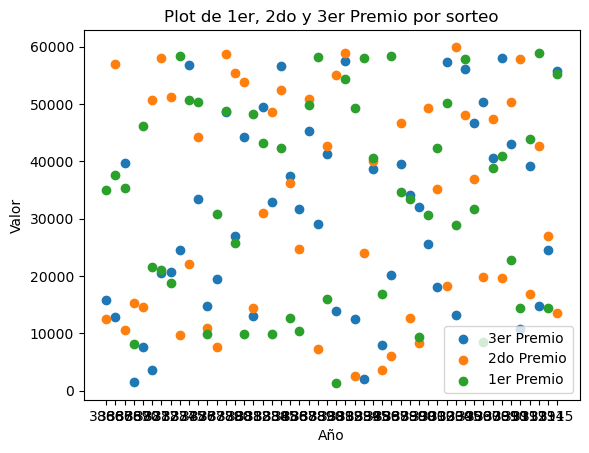

In [113]:
plt.scatter(df_pivot_todos["ORIGEN"], df_pivot_todos[300000], label = "3er Premio")
plt.scatter(df_pivot_todos["ORIGEN"], df_pivot_todos[850000], label = "2do Premio")
plt.scatter(df_pivot_todos["ORIGEN"], df_pivot_todos[7000000], label = "1er Premio")

plt.xlabel('Año')
plt.ylabel('Valor')
plt.title('Plot de 1er, 2do y 3er Premio por sorteo')
plt.legend()
plt.show()